<a href="https://colab.research.google.com/github/kr19al0711/cs985-spotify-regression-lakkh/blob/draft%2F18022025/CS985_Regression_Spotify_RandomForest_OneHotEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [97]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

cs_985_6_spotify_regression_problem_2025_path = kagglehub.competition_download('cs-985-6-spotify-regression-problem-2025')

print('Data source import complete.')


Data source import complete.


In [98]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

In [99]:
# Import training and testing datasets
spotify_train = pd.read_csv(cs_985_6_spotify_regression_problem_2025_path + "/CS98XRegressionTrain.csv")
spotify_test = pd.read_csv(cs_985_6_spotify_regression_problem_2025_path + "/CS98XRegressionTest.csv")


In [100]:
spotify_train.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [101]:
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


There are 3 categorical variables title, artist and top genre.
Also the top genre feature has Null values that would have to be dealt with.

# Exploratory Data Analysis

## Analysing Numerical Features

In [102]:
numerical_features = ["year","bpm","nrgy","dnce","dB","live","val","dur","acous","spch","pop"]

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'bpm'}>,
        <Axes: title={'center': 'nrgy'}>],
       [<Axes: title={'center': 'dnce'}>, <Axes: title={'center': 'dB'}>,
        <Axes: title={'center': 'live'}>],
       [<Axes: title={'center': 'val'}>, <Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'acous'}>],
       [<Axes: title={'center': 'spch'}>,
        <Axes: title={'center': 'pop'}>, <Axes: >]], dtype=object)

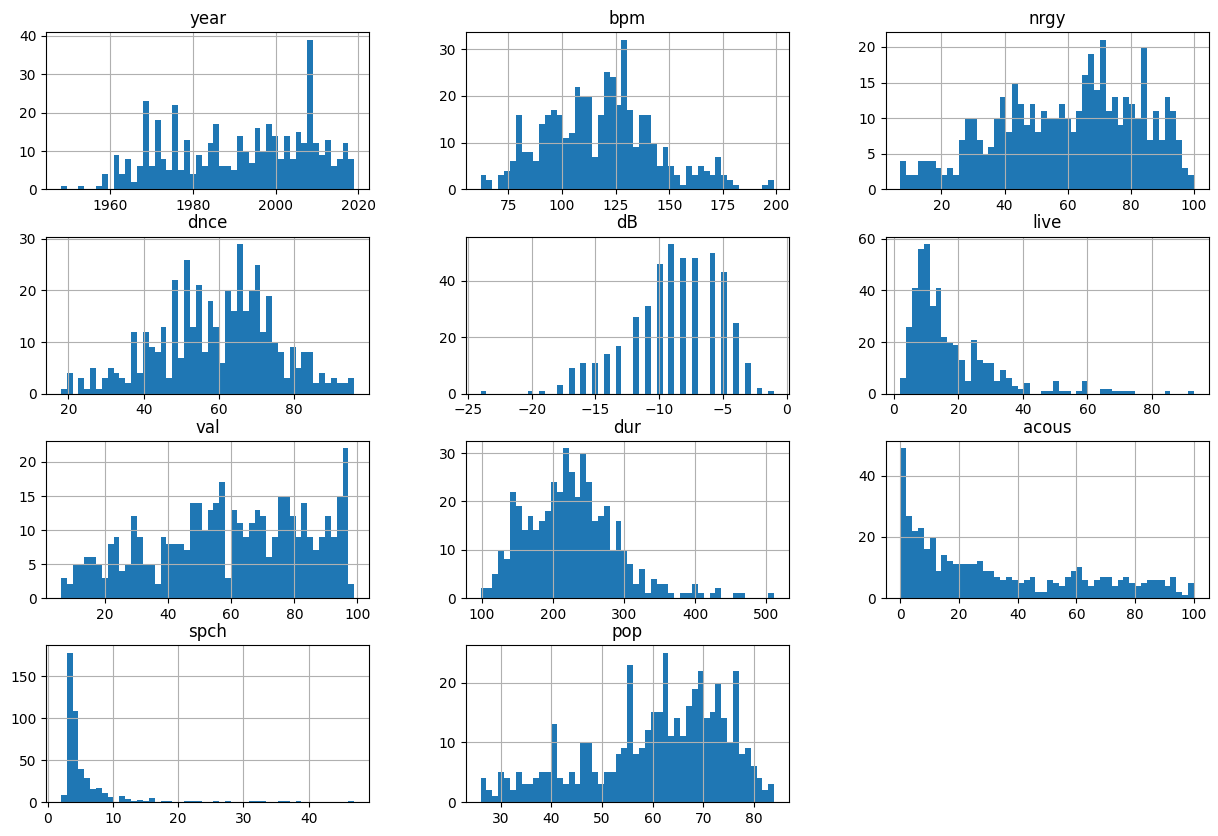

In [103]:
spotify_train[numerical_features].hist(bins=50, figsize=(15,10))

## Correlation between popularity score and other features

<Axes: >

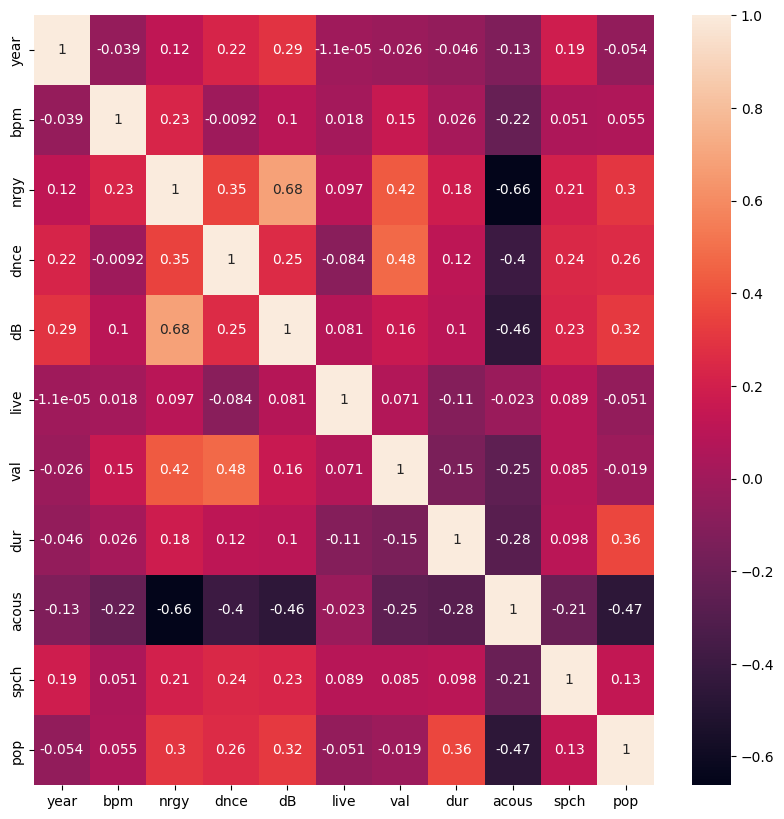

In [104]:
spotify_corr = spotify_train[numerical_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(spotify_corr, annot=True)

In [105]:
# Correlation of features with Popularity scores
spotify_corr['pop'].sort_values(ascending=False)

,pop
pop,1.000000
dur,0.363266
dB,0.316854
nrgy,0.303797
dnce,0.258670
spch,0.130955
bpm,0.055024
val,-0.018713
live,-0.051364
year,-0.054293


<Axes: title={'center': 'Correlation between Popularity score and Year of release'}, xlabel='year', ylabel='pop'>

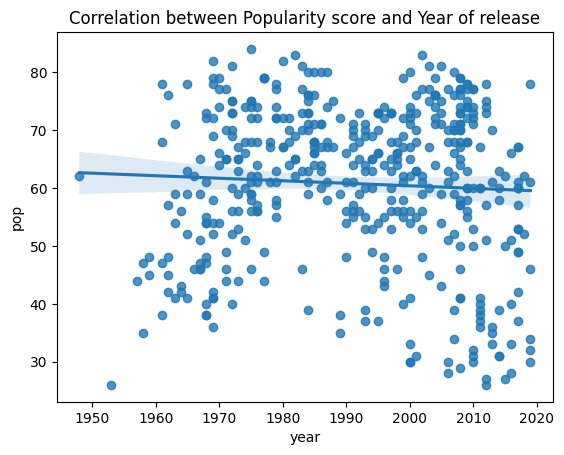

In [106]:
plt.title("Correlation between Popularity score and Year of release")
sns.regplot(x=spotify_train["year"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and BPM'}, xlabel='bpm', ylabel='pop'>

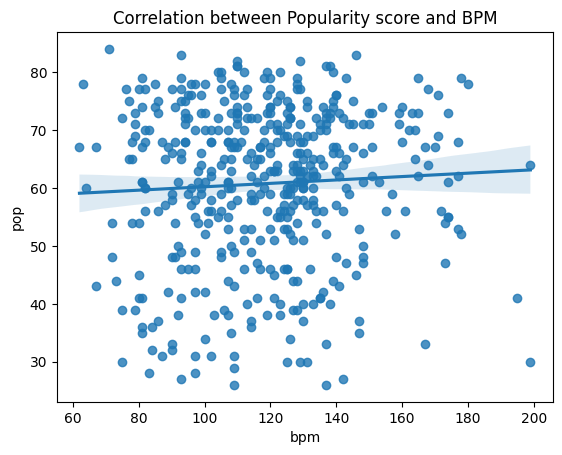

In [107]:
plt.title("Correlation between Popularity score and BPM")
sns.regplot(x=spotify_train["bpm"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Energy'}, xlabel='nrgy', ylabel='pop'>

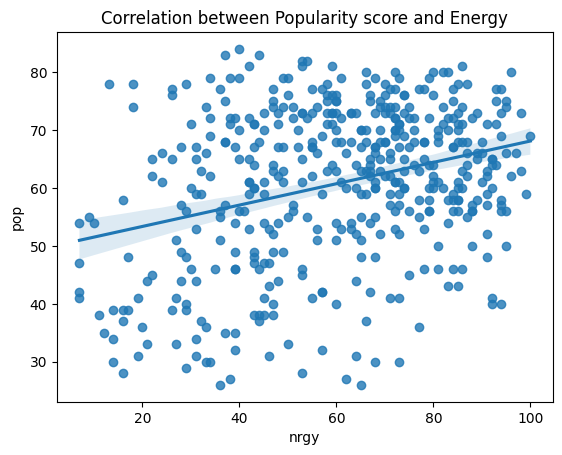

In [108]:
plt.title("Correlation between Popularity score and Energy")
sns.regplot(x=spotify_train["nrgy"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Danceability'}, xlabel='dnce', ylabel='pop'>

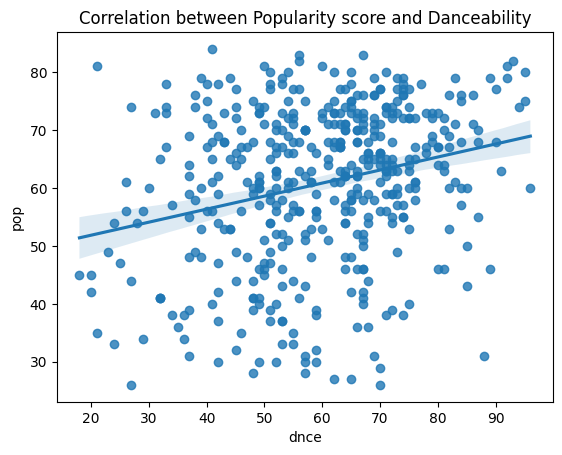

In [109]:
plt.title("Correlation between Popularity score and Danceability")
sns.regplot(x=spotify_train["dnce"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and dB'}, xlabel='dB', ylabel='pop'>

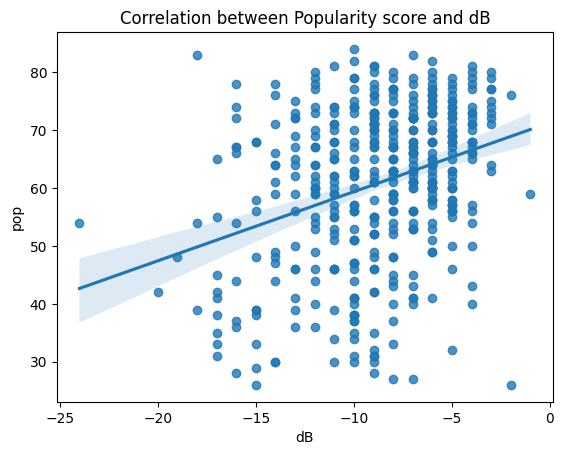

In [110]:
plt.title("Correlation between Popularity score and dB")
sns.regplot(x=spotify_train["dB"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Live'}, xlabel='live', ylabel='pop'>

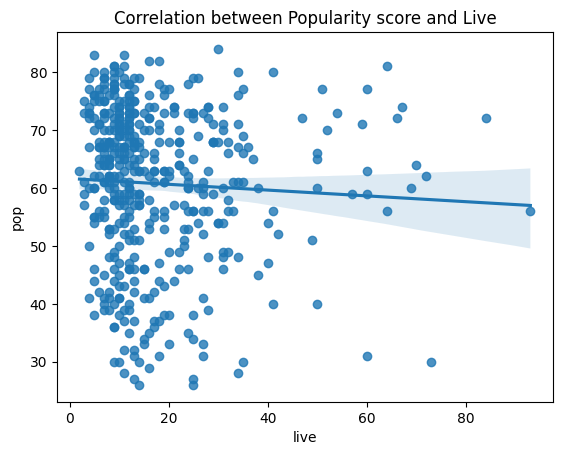

In [111]:
plt.title("Correlation between Popularity score and Live")
sns.regplot(x=spotify_train["live"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Valence'}, xlabel='val', ylabel='pop'>

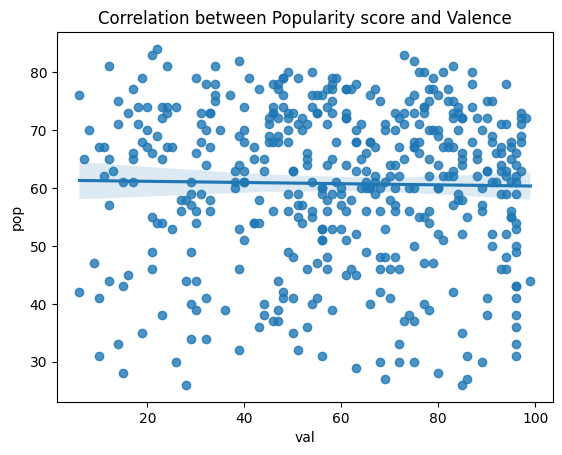

In [112]:
plt.title("Correlation between Popularity score and Valence")
sns.regplot(x=spotify_train["val"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Duration'}, xlabel='dur', ylabel='pop'>

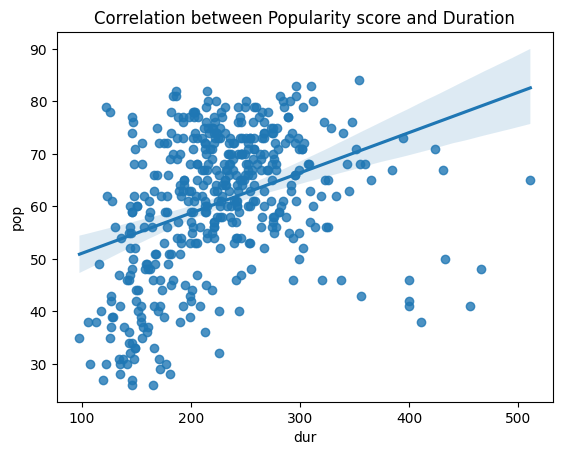

In [113]:
plt.title("Correlation between Popularity score and Duration")
sns.regplot(x=spotify_train["dur"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Speechiness'}, xlabel='spch', ylabel='pop'>

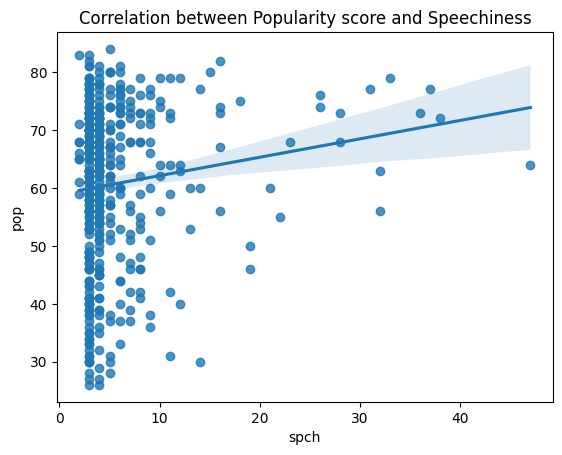

In [114]:
plt.title("Correlation between Popularity score and Speechiness")
sns.regplot(x=spotify_train["spch"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Acoustic'}, xlabel='acous', ylabel='pop'>

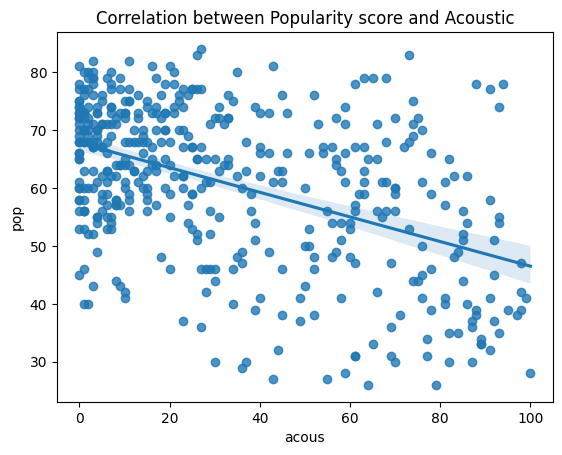

In [115]:
plt.title("Correlation between Popularity score and Acoustic")
sns.regplot(x=spotify_train["acous"],y=spotify_train["pop"])

We can see that dataset features  year, valence, liveness, bpm show  little to no correlation  with the popularity score.



<Axes: >

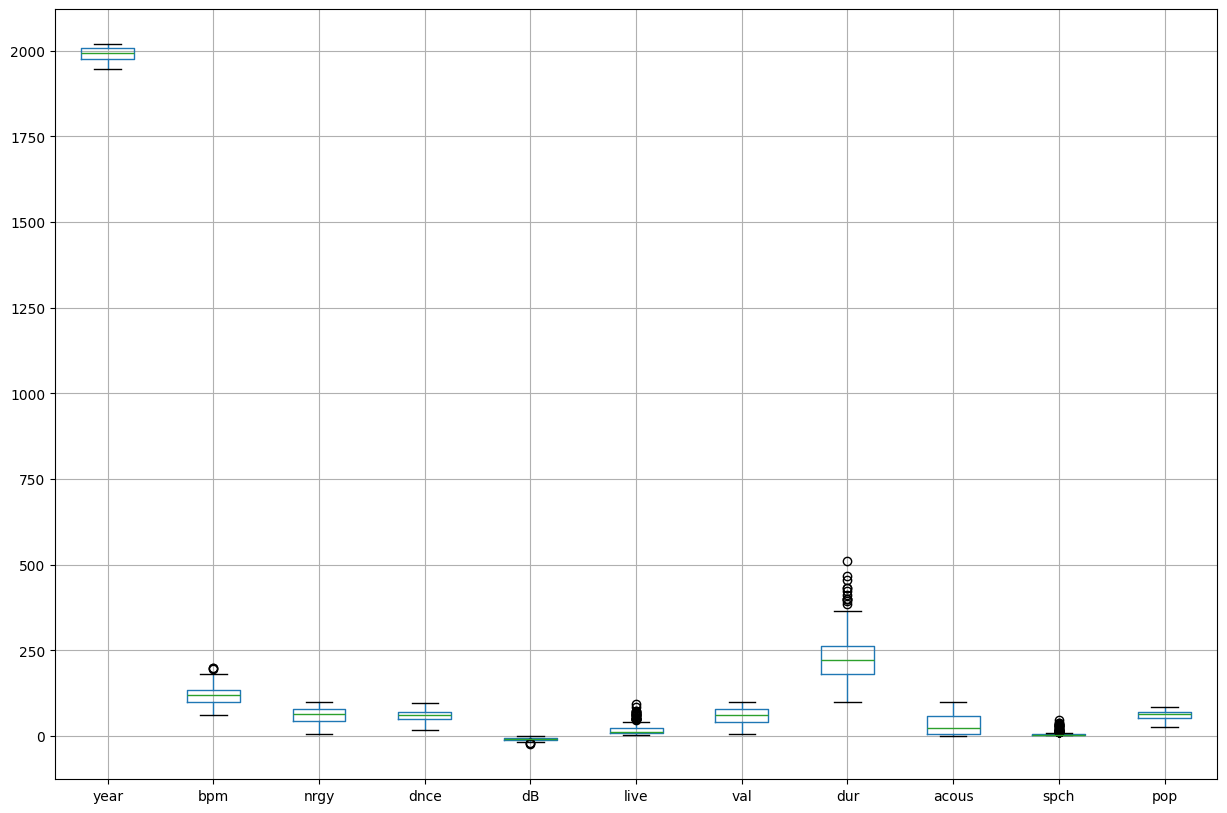

In [116]:
spotify_train[numerical_features].boxplot(figsize=(15,10))

## Analysing Categorical Features

In [117]:
categorical_features = ["artist","title","top genre"]

for cat in categorical_features:
  spotify_train[cat] = spotify_train[cat].astype("category")
  spotify_test[cat] = spotify_test[cat].astype("category")


In [118]:
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Id         453 non-null    int64   
 1   title      453 non-null    category
 2   artist     453 non-null    category
 3   top genre  438 non-null    category
 4   year       453 non-null    int64   
 5   bpm        453 non-null    int64   
 6   nrgy       453 non-null    int64   
 7   dnce       453 non-null    int64   
 8   dB         453 non-null    int64   
 9   live       453 non-null    int64   
 10  val        453 non-null    int64   
 11  dur        453 non-null    int64   
 12  acous      453 non-null    int64   
 13  spch       453 non-null    int64   
 14  pop        453 non-null    int64   
dtypes: category(3), int64(12)
memory usage: 78.0 KB


There are 15 Null values in the Top Genre column


# Data Processing


## Handling Null Values
### Filling Null values with the most common genre

In [119]:
most_frequent_genre = spotify_train['top genre'].mode()[0]

spotify_train['top genre'].fillna(most_frequent_genre, inplace=True)
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Id         453 non-null    int64   
 1   title      453 non-null    category
 2   artist     453 non-null    category
 3   top genre  453 non-null    category
 4   year       453 non-null    int64   
 5   bpm        453 non-null    int64   
 6   nrgy       453 non-null    int64   
 7   dnce       453 non-null    int64   
 8   dB         453 non-null    int64   
 9   live       453 non-null    int64   
 10  val        453 non-null    int64   
 11  dur        453 non-null    int64   
 12  acous      453 non-null    int64   
 13  spch       453 non-null    int64   
 14  pop        453 non-null    int64   
dtypes: category(3), int64(12)
memory usage: 78.0 KB


<ipython-input-119-cc7524a720a5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spotify_train['top genre'].fillna(most_frequent_genre, inplace=True)


## One-Hot Encoding Categorical Values

In [120]:
#  print(categorical_features)

In [121]:
one_hot_encoder = OneHotEncoder(handle_unknown='warn')
spotify_train_encoded = one_hot_encoder.fit_transform(spotify_train[categorical_features])
spotify_test_encoded = one_hot_encoder.transform(spotify_test[categorical_features])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [122]:
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Id         453 non-null    int64   
 1   title      453 non-null    category
 2   artist     453 non-null    category
 3   top genre  453 non-null    category
 4   year       453 non-null    int64   
 5   bpm        453 non-null    int64   
 6   nrgy       453 non-null    int64   
 7   dnce       453 non-null    int64   
 8   dB         453 non-null    int64   
 9   live       453 non-null    int64   
 10  val        453 non-null    int64   
 11  dur        453 non-null    int64   
 12  acous      453 non-null    int64   
 13  spch       453 non-null    int64   
 14  pop        453 non-null    int64   
dtypes: category(3), int64(12)
memory usage: 78.0 KB


In [123]:

spotify_train_encoded = pd.DataFrame(spotify_train_encoded.toarray(),index=spotify_train.index)
spotify_test_encoded = pd.DataFrame(spotify_test_encoded.toarray(),index=spotify_test.index)

In [124]:
spotify_test_encoded.shape

(114, 882)

In [125]:
spotify_train = pd.concat([spotify_train[numerical_features],spotify_train_encoded],axis=1)

In [126]:
input_numerical = ["year","bpm","nrgy","dnce","dB","live","val","dur","acous","spch"]

In [127]:
spotify_test = pd.concat([spotify_test[input_numerical],spotify_test_encoded],axis=1)

In [128]:
spotify_train.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,872,873,874,875,876,877,878,879,880,881
0,1996,107,31,45,-8,13,28,150,75,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,114,44,53,-8,13,47,139,49,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1979,105,36,63,-9,13,67,245,11,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1980,170,28,47,-16,13,33,232,25,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1973,121,47,56,-8,15,40,193,45,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
spotify_test.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,872,873,874,875,876,877,878,879,880,881
0,2005,154,93,65,-3,75,74,213,1,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,161,39,30,-15,11,14,292,26,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1977,64,46,27,-7,12,18,179,38,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,127,92,71,-9,37,53,216,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,115,46,56,-12,21,34,153,18,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Training


In [130]:
X_train = spotify_train.drop(['pop'], axis=1)
X_test = spotify_test
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
y_train = spotify_train['pop']

In [131]:
X_train.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,872,873,874,875,876,877,878,879,880,881
0,1996,107,31,45,-8,13,28,150,75,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,114,44,53,-8,13,47,139,49,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1979,105,36,63,-9,13,67,245,11,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1980,170,28,47,-16,13,33,232,25,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1973,121,47,56,-8,15,40,193,45,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
X_test.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,...,872,873,874,875,876,877,878,879,880,881
0,2005,154,93,65,-3,75,74,213,1,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,161,39,30,-15,11,14,292,26,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1977,64,46,27,-7,12,18,179,38,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,127,92,71,-9,37,53,216,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,115,46,56,-12,21,34,153,18,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
y_train

,pop
0,44
1,37
2,77
3,67
4,63
...,...
448,45
449,50
450,77
451,62


In [ ]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [134]:
base_model = RandomForestRegressor(n_estimators=1000, random_state=19)
base_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=19)

In [135]:
y_predict = base_model.predict(X_test)

In [136]:
y_predict

array([70.14 , 70.822, 57.913, 62.506, 43.471, 67.503, 61.78 , 46.532,
       65.085, 65.441, 56.341, 69.124, 59.545, 65.367, 68.442, 61.783,
       61.776, 65.257, 68.509, 66.122, 50.577, 56.17 , 62.153, 48.02 ,
       47.438, 69.363, 62.581, 52.242, 34.963, 71.239, 70.915, 49.99 ,
       70.992, 69.68 , 67.987, 72.859, 64.629, 62.04 , 63.918, 68.003,
       67.35 , 63.917, 66.776, 42.435, 65.996, 61.63 , 64.944, 62.072,
       61.297, 65.585, 40.252, 70.689, 63.565, 47.672, 64.565, 63.722,
       67.696, 50.034, 68.668, 48.503, 64.801, 67.391, 67.698, 66.338,
       70.312, 65.875, 69.519, 60.306, 63.521, 50.616, 69.963, 56.186,
       51.417, 67.141, 61.974, 69.222, 71.832, 65.662, 66.639, 56.949,
       67.29 , 62.468, 48.337, 70.184, 50.727, 57.798, 67.471, 69.125,
       34.377, 70.37 , 34.397, 66.667, 71.053, 67.032, 67.301, 69.046,
       61.771, 62.888, 66.424, 42.547, 49.14 , 64.486, 70.3  , 55.987,
       34.708, 69.214, 69.92 , 64.342, 63.82 , 65.509, 63.681, 64.081,
      

In [137]:
output = pd.DataFrame({'Id': spotify_test.Id,'pop': y_predict})
output.to_csv('submission.csv', index=False)

AttributeError: 'DataFrame' object has no attribute 'Id'